<a href="https://colab.research.google.com/github/UtwoA/Introduction_to_ML/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('diabetes.csv')
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
print("Размер датасета:", df.shape)
display(df.head())


Размер датасета: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.describe().T)

                  count        mean         std     min       25%       50%  \
Pregnancies       768.0    3.845052    3.369578   0.000   1.00000    3.0000   
Glucose           768.0  120.894531   31.972618   0.000  99.00000  117.0000   
BloodPressure     768.0   69.105469   19.355807   0.000  62.00000   72.0000   
SkinThickness     768.0   20.536458   15.952218   0.000   0.00000   23.0000   
Insulin           768.0   79.799479  115.244002   0.000   0.00000   30.5000   
BMI               768.0   31.992578    7.884160   0.000  27.30000   32.0000   
DiabetesPedigree  768.0    0.471876    0.331329   0.078   0.24375    0.3725   
Age               768.0   33.240885   11.760232  21.000  24.00000   29.0000   
Outcome           768.0    0.348958    0.476951   0.000   0.00000    0.0000   

                        75%     max  
Pregnancies         6.00000   17.00  
Glucose           140.25000  199.00  
BloodPressure      80.00000  122.00  
SkinThickness      32.00000   99.00  
Insulin           1

In [ ]:
cols_zero_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_zero_missing:
    n_zero = (df[c] == 0).sum()
    print(f"{c}: нулей = {n_zero}")

Glucose: нулей = 5
BloodPressure: нулей = 35
SkinThickness: нулей = 227
Insulin: нулей = 374
BMI: нулей = 11


In [ ]:
X = df.drop('Outcome', axis=1).copy()
y = df['Outcome'].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)
print("Размеры:", X_train.shape, X_test.shape)

Размеры: (537, 8) (231, 8)


In [ ]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, max_iter=2000, tol=1e-7, l2=0.0, verbose=False):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.l2 = l2
        self.verbose = verbose
        self.w = None
        self.b = None
        self.loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -250, 250)
        return 1.0 / (1.0 + np.exp(-z))

    def loss(self, y_true, y_pred):
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        base = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        if self.l2 > 0:
            base += (self.l2 / 2.0) * np.sum(self.w ** 2)
        return base

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0.0
        for it in range(self.max_iter):
            z = X.dot(self.w) + self.b
            p = self.sigmoid(z)
            error = p - y
            dw = (X.T.dot(error)) / n + self.l2 * self.w
            db = np.mean(error)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            cur_loss = self.loss(y, p)
            self.loss_history.append(cur_loss)
            if self.verbose and it % 200 == 0:
                print(f"iter {it}, loss={cur_loss:.6f}")
            if it > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                if self.verbose:
                    print("Converged at iteration", it)
                break

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.w) + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

iter 0, loss=0.693152
iter 200, loss=0.480958
iter 400, loss=0.479636
iter 600, loss=0.479587
Converged at iteration 701

=== Модель: все признаки ===
Accuracy: 0.7489177489177489
ROC AUC: 0.8362962962962963
Coefficients: [ 0.4178  1.0515 -0.1757 -0.0435 -0.044   0.6582  0.217   0.1139]
Bias: -0.8742
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.69      0.52      0.59        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



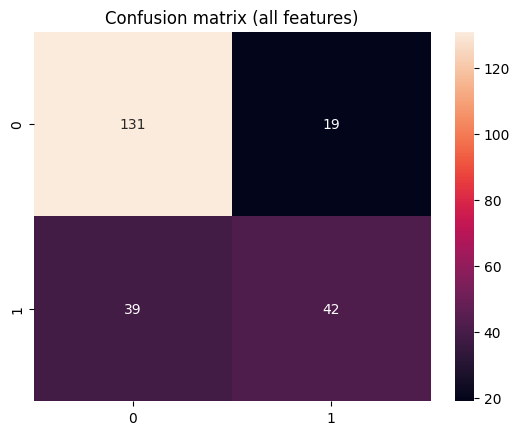

In [ ]:
model_all = LogisticRegressionManual(learning_rate=0.1, max_iter=5000, tol=1e-8, l2=0.01, verbose=True)
model_all.fit(X_train, y_train)

y_pred_all = model_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)
roc_all = roc_auc_score(y_test, model_all.predict_proba(X_test))
print("\n=== Модель: все признаки ===")
print("Accuracy:", acc_all)
print("ROC AUC:", roc_all)
print("Coefficients:", np.round(model_all.w, 4))
print("Bias:", np.round(model_all.b, 4))
print(classification_report(y_test, y_pred_all))
sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='d'); plt.title('Confusion matrix (all features)'); plt.show()


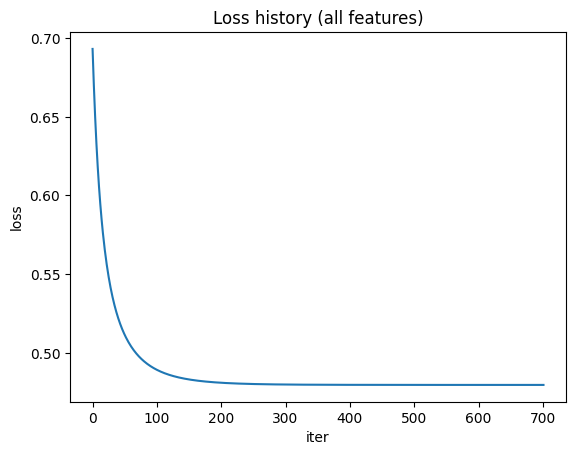

In [ ]:
plt.plot(model_all.loss_history); plt.title('Loss history (all features)'); plt.xlabel('iter'); plt.ylabel('loss'); plt.show()


In [ ]:
corr_abs = df.corr()['Outcome'].abs().sort_values()
print("\nАбсолютная корреляция с Outcome:\n", corr_abs)
to_drop = corr_abs.drop('Outcome').head(2).index.tolist()
print("Удаляем признаки:", to_drop)


Абсолютная корреляция с Outcome:
 BloodPressure       0.065068
SkinThickness       0.074752
Insulin             0.130548
DiabetesPedigree    0.173844
Pregnancies         0.221898
Age                 0.238356
BMI                 0.292695
Glucose             0.466581
Outcome             1.000000
Name: Outcome, dtype: float64
Удаляем признаки: ['BloodPressure', 'SkinThickness']


In [ ]:
X_reduced = df.drop(['Outcome'] + to_drop, axis=1)
X_reduced_scaled = scaler.fit_transform(X_reduced)
Xtr_r, Xte_r, ytr_r, yte_r = train_test_split(X_reduced_scaled, y, test_size=0.3, random_state=42, stratify=y)



=== Модель: уменьшенное пространство ===
Accuracy: 0.7316017316017316
ROC AUC: 0.8334156378600823
Coefficients: [ 0.4087  1.0485 -0.0754  0.6067  0.2185  0.089 ]
Bias: -0.8674
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



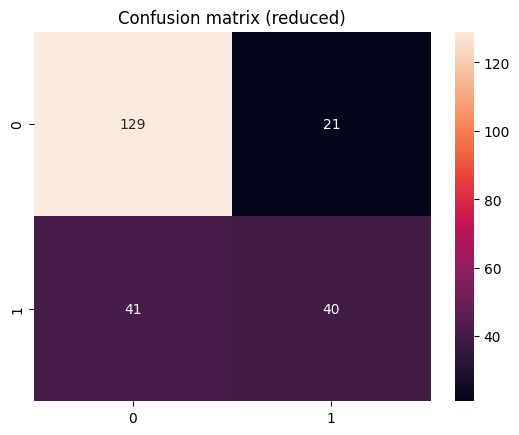

In [ ]:
model_red = LogisticRegressionManual(learning_rate=0.1, max_iter=5000, tol=1e-8, l2=0.01)
model_red.fit(Xtr_r, ytr_r)

y_pred_red = model_red.predict(Xte_r)
acc_red = accuracy_score(yte_r, y_pred_red)
roc_red = roc_auc_score(yte_r, model_red.predict_proba(Xte_r))
print("\n=== Модель: уменьшенное пространство ===")
print("Accuracy:", acc_red)
print("ROC AUC:", roc_red)
print("Coefficients:", np.round(model_red.w, 4))
print("Bias:", np.round(model_red.b, 4))
print(classification_report(yte_r, y_pred_red))
sns.heatmap(confusion_matrix(yte_r, y_pred_red), annot=True, fmt='d'); plt.title('Confusion matrix (reduced)'); plt.show()


In [ ]:
print("\nСравнение:")
print("Accuracy (all):", acc_all)
print("Accuracy (reduced):", acc_red)
print("ROC AUC (all):", roc_all)
print("ROC AUC (reduced):", roc_red)



Сравнение:
Accuracy (all): 0.7489177489177489
Accuracy (reduced): 0.7316017316017316
ROC AUC (all): 0.8362962962962963
ROC AUC (reduced): 0.8334156378600823


In [ ]:
target_reg = 'Glucose'
X_reg = df.drop([target_reg,'Outcome'], axis=1)
y_reg = df[target_reg]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(Xr_train, yr_train)
r2 = lr.score(Xr_test, yr_test)
print("\n=== Часть 3: Линейная регрессия ===")
print("R^2 predicting Glucose:", r2)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


=== Часть 3: Линейная регрессия ===
R^2 predicting Glucose: 0.14997091162736054
Coefficients: [ 0.11645789  0.12834521 -0.44392911  0.108331    0.80968606 10.16289805
  0.60269491]
Intercept: 61.29330700185956
